<a href="https://colab.research.google.com/github/ambermgeer/Final-Project/blob/main/Final_Project_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer segmentation for targeted marketing**: This project uses machine learning models to segment customers into groups with similar characteristics, allowing businesses to create targeted marketing campaigns for each segment, increasing marketing effectiveness.

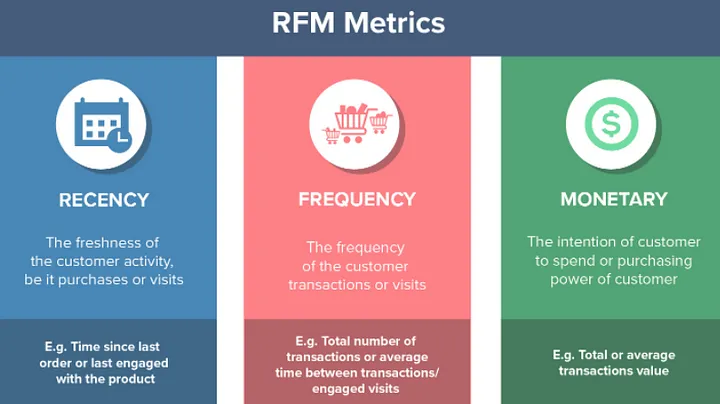

In [ ]:
# Install Kaggle for project
!pip install kaggle

In [ ]:
# Per video easier to mount on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle (1).json ~/.kaggle/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` cp /content/drive/MyDrive/Kaggle_API/kaggle (1).json ~/.kaggle/'


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# Download Kaggle Dataset
! kaggle datasets download mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
 62% 9.00M/14.5M [00:00<00:00, 54.4MB/s]
100% 14.5M/14.5M [00:00<00:00, 79.3MB/s]


In [ ]:
# Unzip file
! unzip /content/online-retail-ii-uci.zip

Archive:  /content/online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


In [ ]:
# Import libraries needed for project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read CSV file
df = pd.read_csv("/content/online_retail_II.csv", encoding='unicode_escape')


In [ ]:
# Head of the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RMF_Segment
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,739,92.0,1142.0,1,1,1,3,Low Value Customer
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,739,92.0,1142.0,1,1,1,3,Low Value Customer
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,739,92.0,1142.0,1,1,1,3,Low Value Customer
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,739,92.0,1142.0,1,1,1,3,Low Value Customer
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,739,92.0,1142.0,1,1,1,3,Low Value Customer


In [ ]:
# Understand the numerical features
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
count,1.067371e+06,1067371,1.067371e+06,824364.000000,1.067371e+06,824364.000000,824364.000000,1.067371e+06,1.067371e+06,1.067371e+06,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504,3.410911e+02,1071.122215,4000.394994,3.189107e+00,9.248293e-01,8.745328e-01,4.988469e+00
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,1.000000e+00,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,1.410000e+02,147.000000,438.000000,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,3.670000e+02,353.000000,1042.000000,3.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,5.190000e+02,814.000000,2413.000000,5.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,7.390000e+02,13097.000000,71343.000000,5.000000e+00,5.000000e+00,5.000000e+00,1.500000e+01
std,1.727058e+02,NaN,1.235531e+02,1697.464450,2.187956e+02,2311.218994,10498.521432,1.410961e+00,8.237618e-01,6.976271e-01,2.079559e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Invoice         1067371 non-null  object        
 1   StockCode       1067371 non-null  object        
 2   Description     1062989 non-null  object        
 3   Quantity        1067371 non-null  int64         
 4   InvoiceDate     1067371 non-null  datetime64[ns]
 5   Price           1067371 non-null  float64       
 6   Customer ID     824364 non-null   float64       
 7   Country         1067371 non-null  object        
 8   Recency         1067371 non-null  int64         
 9   Frequency       824364 non-null   float64       
 10  Monetary        824364 non-null   float64       
 11  RecencyScore    1067371 non-null  int64         
 12  FrequencyScore  1067371 non-null  int64         
 13  MonetaryScore   1067371 non-null  int64         
 14  RFM_Score       10

# **Use RFM Analysis**

R - Recency

F - Frequency

M - Monetary

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Recency', 'Frequency', 'Monetary',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'RMF_Segment'],
      dtype='object')

In [ ]:
# Calculate Recency (How much time has elapsed since a customer's last activity or transaction)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

df['Recency'] = (current_date - df['InvoiceDate']).dt.days

In [ ]:
# Calculate Frequency (How often has the customer transacted or interacted with brand during a set time)
df['Frequency'] = df.groupby('Customer ID')['Customer ID'].transform('count')

In [ ]:
# Calculate Monetary (How much the customer has spent)
df['Monetary'] = df.groupby('Customer ID')['Price'].transform(lambda x: round(x.sum()))

In [ ]:
# Create dataframe with RFM

rfm = df.groupby('Customer ID').agg({'Recency': 'min',
                                     'Frequency': 'sum',
                                     'Monetary': 'sum'}).reset_index()

rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,2304.0,27840.0
1,12347.0,2,64009.0,162932.0
2,12348.0,75,2601.0,9843.0
3,12349.0,19,32400.0,270900.0
4,12350.0,310,289.0,1105.0


In [ ]:
# Define scoring criteria for each RFM value

recency_score = [5, 4, 3, 2, 1]
frequency_score = [1, 2, 3, 4, 5]
monetary_score = [1, 2, 3, 4, 5]

# Calculate RFM Scores

df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_score)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_score)
df['MonetaryScore'] = pd.cut(df['Monetary'], bins=5, labels=monetary_score)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Invoice         1067371 non-null  object        
 1   StockCode       1067371 non-null  object        
 2   Description     1062989 non-null  object        
 3   Quantity        1067371 non-null  int64         
 4   InvoiceDate     1067371 non-null  datetime64[ns]
 5   Price           1067371 non-null  float64       
 6   Customer ID     824364 non-null   float64       
 7   Country         1067371 non-null  object        
 8   Recency         1067371 non-null  int64         
 9   Frequency       824364 non-null   float64       
 10  Monetary        824364 non-null   float64       
 11  RecencyScore    1067371 non-null  category      
 12  FrequencyScore  824364 non-null   category      
 13  MonetaryScore   824364 non-null   category      
 14  RFM_Score       10

In [ ]:
# Convert RFM scores to numeric score

df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_score, duplicates='drop').astype('category')
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_score, duplicates='drop').astype('category')
df['MonetaryScore'] = pd.cut(df['Monetary'], bins=5, labels=monetary_score, duplicates='drop').astype('category')

# Fill NaN values with 0 before converting to integer
df['RecencyScore'] = df['RecencyScore'].cat.add_categories([0]).fillna(0).astype(int)
df['FrequencyScore'] = df['FrequencyScore'].cat.add_categories([0]).fillna(0).astype(int)
df['MonetaryScore'] = df['MonetaryScore'].cat.add_categories([0]).fillna(0).astype(int)

In [ ]:
# Calculate RFM score

df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

In [ ]:
# Create RMF segments based on RFM Scores
def segment_customer(score):
    if score >= 8:
        return 'Top Consumer'
    elif score >= 5:
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

df['RMF_Segment'] = df['RFM_Score'].apply(segment_customer)

In [ ]:
# RFM Segment Distribution

segment_counts = df['RMF_Segment'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='RFM_Segment', y='Count',
                          color='RFM_Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

In [ ]:
customer_country = df.groupby('Country').size().reset_index(name='Count')

# Number of unique countries
countries = customer_country['Country'].value_counts()
print(f'Number of unique countries: {len(countries)}')

Number of unique countries: 43


In [ ]:
# Index Countries

countries.index

Index(['Australia', 'Saudi Arabia', 'Lithuania', 'Malta', 'Netherlands',
       'Nigeria', 'Norway', 'Poland', 'Portugal', 'RSA', 'Singapore', 'Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'USA',
       'United Arab Emirates', 'United Kingdom', 'Unspecified', 'Lebanon',
       'Japan', 'Austria', 'Denmark', 'Bahrain', 'Belgium', 'Bermuda',
       'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic',
       'EIRE', 'Italy', 'European Community', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Iceland', 'Israel', 'West Indies'],
      dtype='object', name='Country')

In [ ]:
# Create RMF segments based on RFM Scores
def segment_customer(score):
    if score >= 8:
        return 'Top Consumer'
    elif score >= 5:
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Create 'RFM_Segment' column to calculate country_rfm
df['RFM_Segment'] = df['RFM_Score'].apply(segment_customer)

# Countries and their RFM Score & RFM
country_rfm = df.groupby('Country').agg({'RFM_Score': 'mean', 'RFM_Segment': lambda x: x.mode()[0]}).reset_index()

print(country_rfm)

                 Country  RFM_Score         RFM_Segment
0              Australia   5.615264  Mid Value Customer
1                Austria   5.121535  Mid Value Customer
2                Bahrain   3.023810  Low Value Customer
3                Belgium   5.611912  Mid Value Customer
4                Bermuda   1.000000  Low Value Customer
5                 Brazil   4.680851  Low Value Customer
6                 Canada   5.688596  Mid Value Customer
7        Channel Islands   5.262620  Mid Value Customer
8                 Cyprus   4.803571  Mid Value Customer
9         Czech Republic   6.433333  Mid Value Customer
10               Denmark   5.184823  Mid Value Customer
11                  EIRE  10.859678        Top Consumer
12    European Community   6.475410  Mid Value Customer
13               Finland   5.581506  Mid Value Customer
14                France   5.436916  Mid Value Customer
15               Germany   5.237687  Mid Value Customer
16                Greece   4.558069  Mid Value C

In [ ]:
# Create Pie Chart with Country and RMF Value

fig = px.pie(country_rfm, values='RFM_Score', names='Country', title='RFM Value by Country')
fig.show()

In [ ]:
# Most bought item

most_bought_item = df.groupby('Description')['Quantity'].sum().reset_index()
most_bought_item = most_bought_item.sort_values(by='Quantity', ascending=False)

In [ ]:
# Create a chart with most bought item

fig = px.bar(most_bought_item.head(10), x='Description', y='Quantity',
             title='Top 10 Most Bought Items')
fig.show()

In [ ]:
# The most popular item per country

country_most_bought_item = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
country_most_bought_item = country_most_bought_item.sort_values(by='Quantity', ascending=False)
country_most_bought_item = country_most_bought_item.groupby('Country').head(1)


print(country_most_bought_item)

                    Country                          Description  Quantity
29774        United Kingdom    WORLD WAR 2 GLIDERS ASSTD DESIGNS     99760
4704                Denmark   BLACK AND WHITE PAISLEY FLOWER MUG     25164
16792           Netherlands     FOLKART ZINC HEART CHRISTMAS DEC      6697
21956                Sweden                MINI HIGHLIGHTER PENS      5760
5224                   EIRE          60 TEATIME FAIRY CAKE CASES      5580
10303                France                   RABBIT NIGHT LIGHT      4023
15788                 Japan                   RABBIT NIGHT LIGHT      3401
398               Australia              MINI PAINT SET VINTAGE       3024
12893               Germany  ROUND SNACK BOXES SET OF4 WOODLAND       2738
2619                Bermuda        BOYS ALPHABET IRON ON PATCHES      1152
20296                 Spain        ASSORTED COLOUR BIRD ORNAMENT      1009
23150           Switzerland     PLASTERS IN TIN WOODLAND ANIMALS       891
2118                Belgi